IMPORT All THE NEEDED LIBRARIES


In [1120]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

Next step import your data

In [1121]:
Data = pd.read_csv('heart.csv')
Data.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [1122]:
#Now that we have imported the data we need to understand some things
#*1 what is our dataset saying to us 
#*2 what are the  problems of our data
#*3 what are the things not needed in my dataset
#*4 which algorithm should i use is it supervised or unsupervised
#*5 if supervised which algorithm is the best to solve my problem

Visualize you Dataset

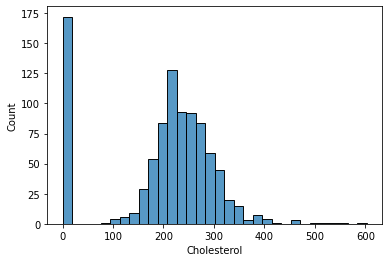

In [1123]:
sns.histplot(Data['Cholesterol'])

C:\Users\1040G3~1\AppData\Local\Temp/ipykernel_19480/3149906492.py:19: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_xticks(x, labels)


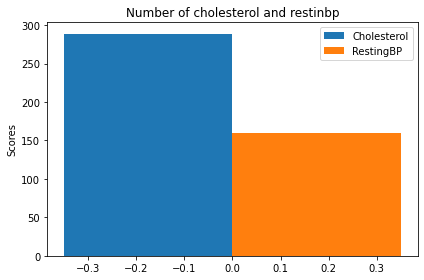

In [1124]:
import matplotlib.pyplot as plt
import numpy as np


labels = [Data.columns]
Cholesterol = Data['Cholesterol'].head()
RestingBP = Data['RestingBP'].head()

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2,Cholesterol , width, label='Cholesterol')
rects2 = ax.bar(x + width/2, RestingBP, width, label='RestingBP')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Number of cholesterol and restinbp')
ax.set_xticks(x, labels)
ax.legend()



fig.tight_layout()

plt.show()


<BarContainer object of 10 artists>

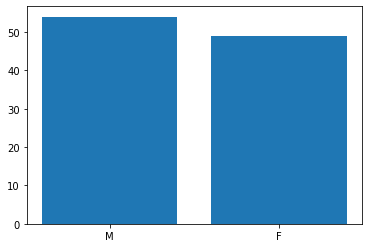

In [1125]:
plt.bar(Data['Sex'].head(10),Data['Age'].head(10))


<BarContainer object of 5 artists>

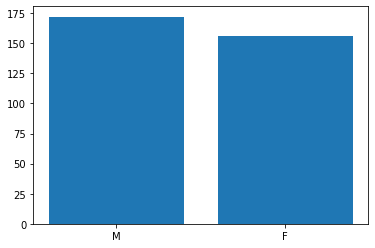

In [1126]:
plt.bar(Data['Sex'].head(),Data['MaxHR'].head())

In [1127]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [1128]:
Data.count()

Age               918
Sex               918
ChestPainType     918
RestingBP         918
Cholesterol       918
FastingBS         918
RestingECG        918
MaxHR             918
ExerciseAngina    918
Oldpeak           918
ST_Slope          918
HeartDisease      918
dtype: int64

In [1129]:
Data.shape

(918, 12)

In [1130]:
Data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [1131]:
Data.isnull().values.any()

False

In [1132]:
def plot_corr(Data, size=11):
    

    corr = Data.corr()    # data frame correlation function
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)   # color code the rectangles by correlation value
    plt.xticks(range(len(corr.columns)), corr.columns)  # draw x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns) 

In [1133]:
Data.loc[Data['Sex'] == 'M','Sex' ] = 0
Data.loc[Data['Sex'] == 'F','Sex' ] = 1

In [1134]:
del Data['RestingECG']

In [1135]:
del Data['ChestPainType']

In [1136]:
del Data['ExerciseAngina']

In [1137]:
del Data['ST_Slope']

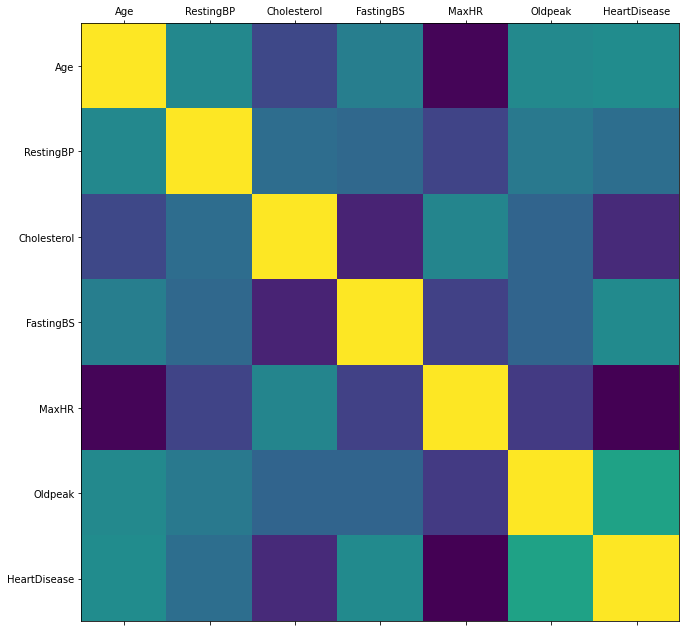

In [1138]:
plot_corr(Data)

In [1139]:
Data.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,40,0,140,289,0,172,0.0,0
1,49,1,160,180,0,156,1.0,1
2,37,0,130,283,0,98,0.0,0
3,48,1,138,214,0,108,1.5,1
4,54,0,150,195,0,122,0.0,0


In [1140]:
num_obs = len(Data)
num_true = len(Data.loc[Data['HeartDisease'] == 1])
num_false = len(Data.loc[Data['HeartDisease'] == 0])
print("Number of True cases:  {0} ({1:2.2f}%)".format(num_true, (num_true/num_obs) * 100))
print("Number of False cases: {0} ({1:2.2f}%)".format(num_false, (num_false/num_obs) * 100))

Number of True cases:  508 (55.34%)
Number of False cases: 410 (44.66%)


In [1141]:

from sklearn.model_selection import train_test_split
feature_col_names = Data.columns
predicted_class_names = ['HeartDisease']

X =  Data[feature_col_names] 
X = X.astype('int')# predictor feature columns (8 X m)
y = Data[predicted_class_names] # predicted class (1=true, 0=false) column (1 X m)
y = y.astype('int')
split_test_size = 0.30
lebel_en2 = LabelEncoder()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size) 
y_test = lebel_en2.fit_transform(y_test)

C:\Users\1040 G3\AppData\Roaming\Python\Python39\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [1142]:
print("{0:0.2f}% in training set".format((len(X_train)/len(Data.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test)/len(Data.index)) * 100))

69.93% in training set
30.07% in test set


In [1143]:
# NEED CALLOUT MENTION CHANGE TO SIMPLEIMPUTER
from sklearn.impute import SimpleImputer

#Impute with mean all 0 readings
fill_0 = SimpleImputer(missing_values=0, strategy="mean")

# Notice the missing_values=0 will be replaced by mean.  However, the num_preg can have a value of 0.
# To prevent replacing the 0 num_preg with the mean we need to skip imputing the 'num_preg' column
cols_not_num_preg = X_train.columns.difference(['num_preg']) # all columns but the num_preg column
pd.options.mode.chained_assignment = None  # Supress warning message on transformed assignment

# impute the training data
X_train[cols_not_num_preg] = fill_0.fit_transform(X_train[cols_not_num_preg])

# impute the test data
X_test[cols_not_num_preg] = fill_0.transform(X_test[cols_not_num_preg])

In [1144]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(criterion='entropy', max_depth=3)      # Create random forest object
rf_model.fit(X_train, y_train.values.flatten())

RandomForestClassifier(criterion='entropy', max_depth=3)

### Predict Training Data

In [1145]:
rf_predict_train = rf_model.predict(X_train)
# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, rf_predict_train)))

Accuracy: 0.7679


### Predict Test Data

In [1146]:
rf_predict_test = rf_model.predict(X_test)

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, rf_predict_test)))

Accuracy: 0.7210


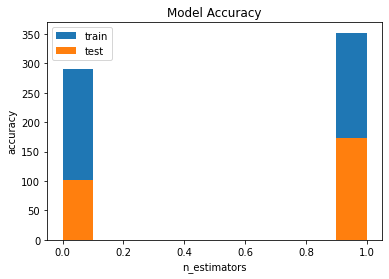

In [1147]:
import matplotlib.pyplot as plt
%matplotlib inline
# Model accuracy
plt.hist(rf_predict_train)
plt.hist(rf_predict_test)
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('n_estimators')
plt.legend(['train', 'test'])
plt.show()

In [1148]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='entropy',max_depth=3)
clf.fit(X_train, y_train.values.flatten()) 

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [1149]:
rf_predict_train = clf.predict(X_train)
# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, rf_predict_train)))

Accuracy: 0.7181


In [1150]:
rf_predict_test = clf.predict(X_test)

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, rf_predict_test)))

Accuracy: 0.7464
